# Exercises week 36

## Deriving and Implementing Ridge Regression

## Learning goals

After completing these exercises, you will know how to
- Take more derivatives of simple products between vectors and matrices
- Implement Ridge regression using the analytical expressions
- Scale data appropriately for linear regression
- Evaluate a model across two different hyperparameters

## Exercise 1 - Choice of model and degrees of freedom

**a)** How many degrees of freedom does an OLS model fit to the features $x, x^2, x^3$ and the intercept have?

ANSWER: 4.

**b)** Why is it bad for a model to have too many degrees of freedom?

ANSWER: Because it increases the training time, can lead to overfitting and loss of generalization.

**c)** Why is it bad for a model to have too few degrees of freedom?

ANSWER: It can lead to underfitting, it might not be able to capture the complexity of the relationships among the variables.

**d)** Read [chapter 3.4.1 of Hastie et al.'s book](https://link.springer.com/book/10.1007/978-0-387-84858-7).
 What is the expression for the effective degrees of freedom of the ridge regression fit?

 ANSWER:
$$
{df}_{eff} = \sum_{j=1}^{p} \frac{d_j^2}{d_j^2 + \lambda},
$$
where $d_j$ are the singular values of X.

**e)** Why might we want to use Ridge regression instead of OLS?

ANSWER: If $\bold{X}^T \bold{X}$ can't be inverted, if there are too many degrees of freedom or if they are highly correlated.

**f)** Why migth we want to use OLS instead of Ridge regression?

ANSWER: If we don't have the problems described above and OLS provides a better fit. 

## Exercise 2 - Deriving the expression for Ridge Regression

The aim here is to derive the expression for the optimal parameters using Ridge regression.

The expression for the standard Mean Squared Error (MSE) which we used to define our cost function and the equations for the ordinary least squares (OLS) method, was given by the optimization problem

$$
{\displaystyle \min_{\boldsymbol{\beta}\in {\mathbb{R}}^{p}}}\frac{1}{n}\left\{\left(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right)^T\left(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right)\right\}.
$$

By minimizing the above equation with respect to the parameters $\boldsymbol{\beta}$ we could then obtain an analytical expression for the parameters $\boldsymbol{\hat\beta_{OLS}}$.

We can add a regularization parameter $\lambda$ by
defining a new cost function to be optimized, that is

$$
{\displaystyle \min_{\boldsymbol{\beta}\in
{\mathbb{R}}^{p}}}\frac{1}{n}\vert\vert \boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\vert\vert_2^2+\lambda\vert\vert \boldsymbol{\beta}\vert\vert_2^2
$$

which leads to the Ridge regression minimization problem. (One can require as part of the optimization problem that $\vert\vert \boldsymbol{\beta}\vert\vert_2^2\le t$, where $t$ is a finite number larger than zero. We will not implement that in this course.)

### a) Expression for Ridge regression

Show that the optimal parameters

$$
\hat{\boldsymbol{\beta}}_{\mathrm{Ridge}} = \left(\boldsymbol{X}^T\boldsymbol{X}+\lambda\boldsymbol{I}\right)^{-1}\boldsymbol{X}^T\boldsymbol{y},
$$

with $\boldsymbol{I}$ being a $p\times p$ identity matrix.

The ordinary least squares result is

$$
\hat{\boldsymbol{\beta}}_{\mathrm{OLS}} = \left(\boldsymbol{X}^T\boldsymbol{X}\right)^{-1}\boldsymbol{X}^T\boldsymbol{y},
$$

ANSWER:

In Ridge regression, we aim to minimize the following cost function:

$$
C(\boldsymbol{X},\boldsymbol{\beta}) = \frac{1}{n}\vert\vert \boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\vert\vert_2^2+\lambda\vert\vert \boldsymbol{\beta}\vert\vert_2^2
$$

We can expand it:

$$
C(\boldsymbol{X},\boldsymbol{\beta}) = (\boldsymbol{y} - \boldsymbol{X}\boldsymbol{\beta})^T (\boldsymbol{y} - \boldsymbol{X}\boldsymbol{\beta}) + \lambda \boldsymbol{\beta}^T \boldsymbol{\beta}
$$

$$
C(\boldsymbol{X},\boldsymbol{\beta}) = \boldsymbol{y}^T \boldsymbol{y} - 2 \boldsymbol{y}^T \boldsymbol{X} \boldsymbol{\beta} + \boldsymbol{\beta}^T \boldsymbol{X}^T \boldsymbol{X} \boldsymbol{\beta} + \lambda \boldsymbol{\beta}^T \boldsymbol{\beta}
$$

Then:
$$
C(\boldsymbol{X},\boldsymbol{\beta}) = \boldsymbol{y}^T \boldsymbol{y} - 2 \boldsymbol{y}^T \boldsymbol{X} \boldsymbol{\beta} + \boldsymbol{\beta}^T (\boldsymbol{X}^T \boldsymbol{X} + \lambda \boldsymbol{I}) \boldsymbol{\beta}
$$

To obtain the optimal parameters, we need to differentiate with respect to $\boldsymbol{\beta}$ and set it to zero:

$$
\frac{\partial C(\boldsymbol{X},\boldsymbol{\beta})}{\partial \boldsymbol{\beta}} = -2\boldsymbol{X}^T \boldsymbol{y} + 2(\boldsymbol{X}^T \boldsymbol{X} + \lambda \boldsymbol{I})\boldsymbol{\beta} = 0
$$

$$
-2\boldsymbol{X}^T \boldsymbol{y} + 2(\boldsymbol{X}^T \boldsymbol{X} + \lambda \boldsymbol{I})\boldsymbol{\beta} = 0
$$

$$
(\boldsymbol{X}^T \boldsymbol{X} + \lambda \boldsymbol{I})\boldsymbol{\beta} = \boldsymbol{X}^T \boldsymbol{y}
$$

Finally, isolating $\boldsymbol{\beta}$:

$$
 \boldsymbol{\beta} = \left(\boldsymbol{X}^T \boldsymbol{X} + \lambda \boldsymbol{I}\right)^{-1} \boldsymbol{X}^T \boldsymbol{y}
 $$
 

## Exercise 3 - Scaling data

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
n = 100
x = np.linspace(-3, 3, n)
y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2) + np.random.normal(0, 0.1)

**a)** Adapt your function from last week to only include the intercept column if the boolean argument `intercept` is set to true.

In [6]:
def polynomial_features(x, p, intercept=False):
    n = len(x)
    X = np.zeros((n, p))
    for i in range(p):
        X[:, i] = x**(i+1)
    if intercept:
        X = np.hstack((np.ones((n, 1)), X))
    return X

X = polynomial_features(x, 5)
print('Shape of X:', X.shape)

X = polynomial_features(x, 5, intercept=True)
print('Shape of X:', X.shape)

Shape of X: (100, 5)
Shape of X: (100, 6)


**b)** Split your data into training and test data(80/20 split)

In [19]:
X = polynomial_features(x, 3)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
x_train = X_train[:, 0] # These are used for plotting
x_test = X_test[:, 0] # These are used for plotting

print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

X_train shape: (80, 3)
X_test shape: (20, 3)


**c)** Scale your design matrix with the sklearn standard scaler, though based on the mean and standard deviation of the training data only.

In [21]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test)
y_offset = np.mean(y_train)

## Exercise 4 - Implementing Ridge Regression

**a)** Implement a function for computing the optimal Ridge parameters using the expression from **2a)**.

In [22]:
def Ridge_parameters(X, y, lmbda):
    # Assumes X is scaled and has no intercept column
    return np.linalg.inv(X.T @ X + lmbda * np.eye(X.shape[1])) @ X.T @ y

beta = Ridge_parameters(X_train_s, y_train, lmbda=0.1)

**b)** Fit a model to the data, and plot the prediction using both the training and test x-values extracted before scaling, and the y_offset.

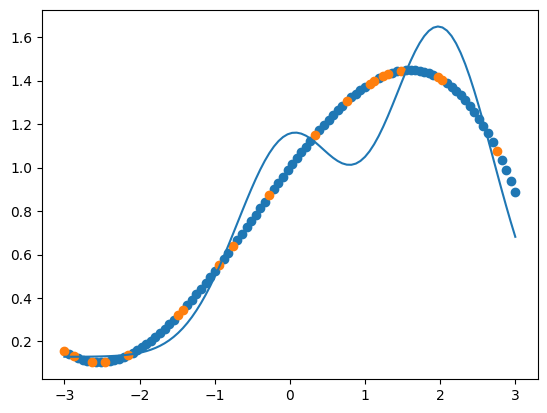

In [23]:
plt.plot(x, y)
plt.scatter(x_train, X_train_s @ beta + y_offset)
plt.scatter(x_test, X_test_s @ beta + y_offset)

## Exercise 4 - Testing multiple hyperparameters

**a)** Compute the MSE of your ridge model for polynomials of degrees 1 to 5 with lambda set to 0.01. Plot the MSE as a function of polynomial degree.

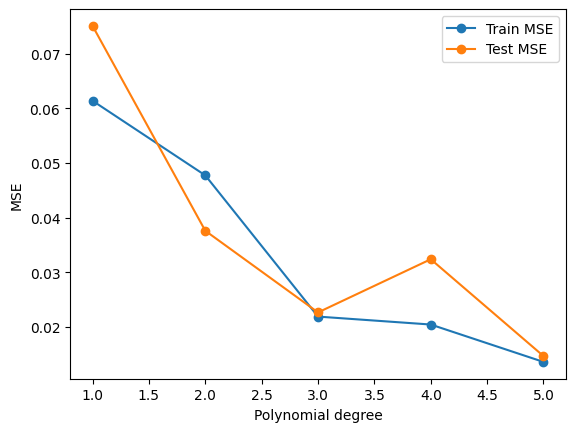

In [33]:
from sklearn.metrics import mean_squared_error

degrees = np.arange(1, 6)
mse_train = []
mse_test = []
for p in degrees:
    X = polynomial_features(x, p)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    scaler = StandardScaler().fit(X_train)
    X_train_s = scaler.transform(X_train)
    X_test_s = scaler.transform(X_test)
    beta = Ridge_parameters(X_train_s, y_train, lmbda=0.01)
    y_pred_train = X_train_s @ beta + y_offset
    mse_train.append(mean_squared_error(y_train, y_pred_train))
    y_pred_test = X_test_s @ beta + y_offset
    mse_test.append(mean_squared_error(y_test, y_pred_test))

plt.figure()
plt.plot(degrees, mse_train, marker='o', label='Train MSE')
plt.plot(degrees, mse_test, marker='o', label='Test MSE')
plt.xlabel('Polynomial degree')
plt.ylabel('MSE')
plt.legend()
plt.show()

**b)** Compute the MSE of your ridge model for a polynomial with degree 3, and with lambdas from $10^{-1}$ to $10^{-5}$ on a logarithmic scale. Plot the MSE as a function of lambda.

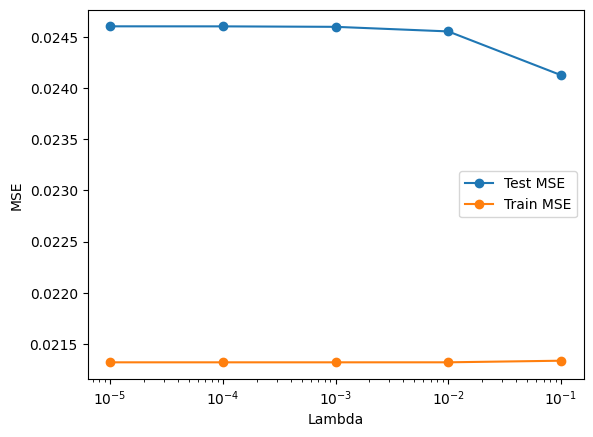

In [34]:
lambdas = np.logspace(-5, -1, 5)
mse_train = []
mse_test = []
X = polynomial_features(x, 3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
scaler = StandardScaler().fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test)
for lmbda in lambdas:
    beta_p = Ridge_parameters(X_train_s, y_train, lmbda=lmbda)
    y_pred_train = X_train_s @ beta_p + y_offset
    mse_train.append(mean_squared_error(y_train, y_pred_train))
    y_pred_test = X_test_s @ beta_p + y_offset
    mse_test.append(mean_squared_error(y_test, y_pred_test))

plt.figure()
plt.semilogx(lambdas, mse_test, marker='o', label='Test MSE')
plt.semilogx(lambdas, mse_train, marker='o', label='Train MSE')
plt.xlabel('Lambda')
plt.ylabel('MSE')   
plt.legend()
plt.show()

**c)** Compute the MSE of your ridge model for polynomials of degrees 1 to 5, and with lambdas from $10^{-1}$ to $10^{-5}$ on a logarithmic scale. Plot the MSE as a function of polynomial degree and lambda using a [heatmap](https://matplotlib.org/stable/gallery/images_contours_and_fields/image_annotated_heatmap.html).

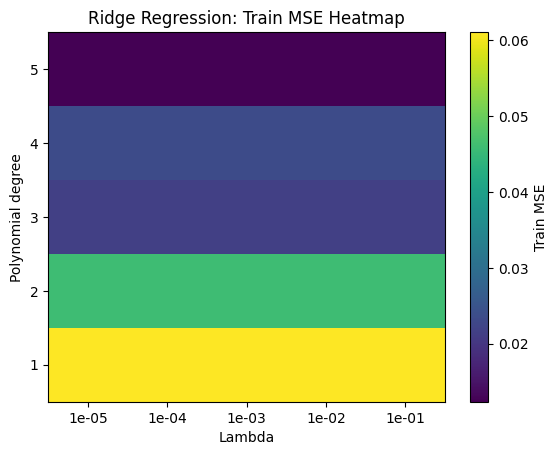

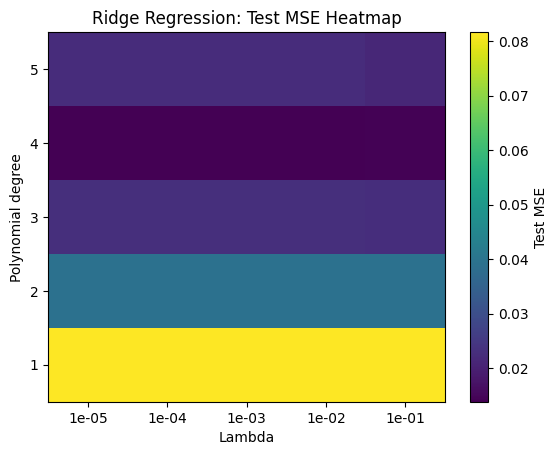

In [36]:
mse_grid_train = np.zeros((len(degrees), len(lambdas)))
mse_grid_test = np.zeros((len(degrees), len(lambdas)))
for i, p in enumerate(degrees):
    X = polynomial_features(x, p)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    scaler = StandardScaler().fit(X_train)
    X_train_s = scaler.transform(X_train)
    X_test_s = scaler.transform(X_test)
    for j, lmbda in enumerate(lambdas):
        beta_p = Ridge_parameters(X_train_s, y_train, lmbda=lmbda)
        y_pred_train = X_train_s @ beta_p + y_offset
        mse_grid_train[i, j] = mean_squared_error(y_train, y_pred_train)
        y_pred_test = X_test_s @ beta_p + y_offset
        mse_grid_test[i, j] = mean_squared_error(y_test, y_pred_test)

plt.figure()
im = plt.imshow(mse_grid_train, aspect='auto', origin='lower', cmap='viridis')
plt.xticks(np.arange(len(lambdas)), [f"{l:.0e}" for l in lambdas])
plt.yticks(np.arange(len(degrees)), degrees)
plt.xlabel('Lambda')
plt.ylabel('Polynomial degree')
plt.title('Ridge Regression: Train MSE Heatmap')
plt.colorbar(im, label='Train MSE')
plt.show()

plt.figure()
im = plt.imshow(mse_grid_test, aspect='auto', origin='lower', cmap='viridis')
plt.xticks(np.arange(len(lambdas)), [f"{l:.0e}" for l in lambdas])
plt.yticks(np.arange(len(degrees)), degrees)
plt.xlabel('Lambda')
plt.ylabel('Polynomial degree')
plt.title('Ridge Regression: Test MSE Heatmap')
plt.colorbar(im, label='Test MSE')
plt.show()